In [1]:
import sys
sys.path.append('/Users/benj/Documents/HiSPEC-analysis-2/')
import SEC_Class_working as sp
import os
import matplotlib.pyplot as plt
import SEC_Class_working as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


In [2]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/MnOxSpEC/2024-07-31-MnOx-attempt2/water_cyclopentene/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/MnOxSpEC/2024-07-31-MnOx-attempt2/water_cyclopentene/CV-3.3.0.0__0.csv


3
Fitted parameters saved to the interpolation attribute are:
        Amplitude:0.4854659392842089
        Period:194.0000352384554
        Phase: 0.0003184097709252197 
        Offset: 1.016514185861959
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


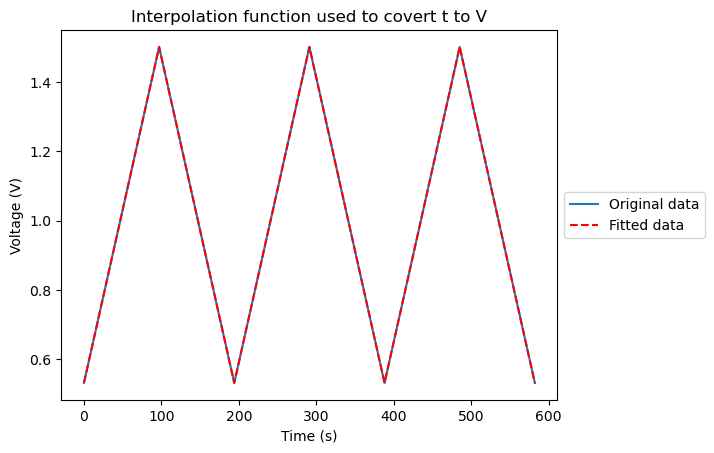

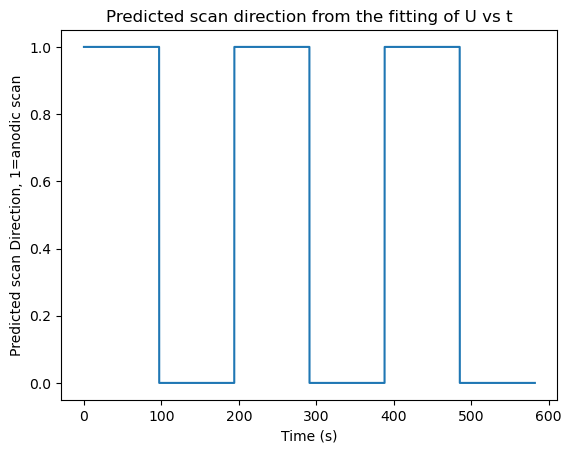

In [81]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()
SpEC1.Downsample_spec_scans(0.001, 2)
test, ref =sp.calculateDOD(SpEC1, 0, 'Cathodic', -1,11)

In [4]:
test=SpEC1.CV

(9701, 2)


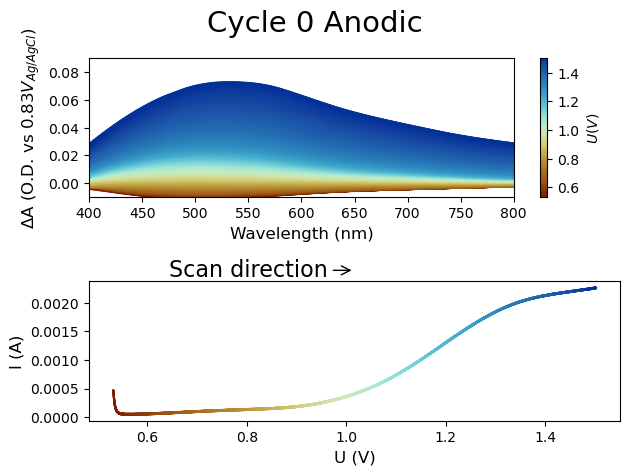

(9700, 2)


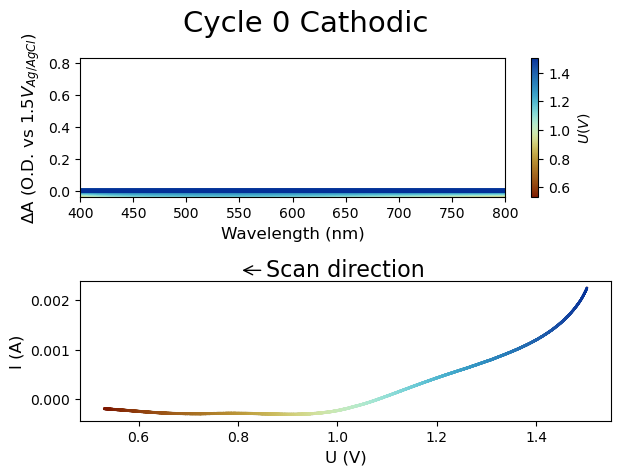

(9700, 2)


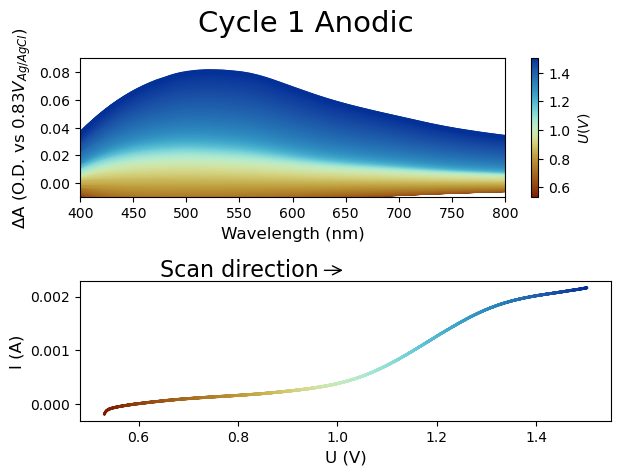

(9700, 2)


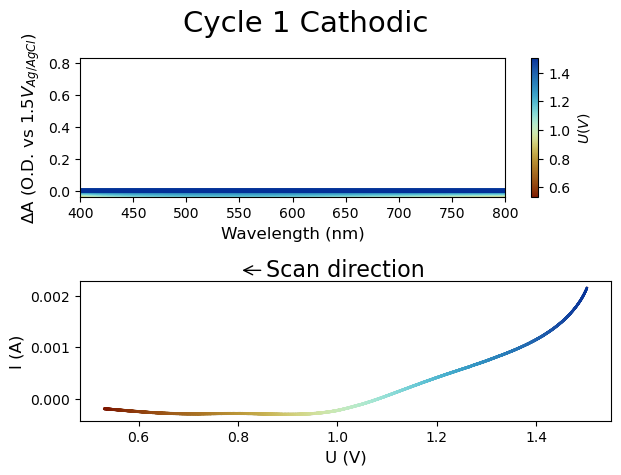

(9700, 2)


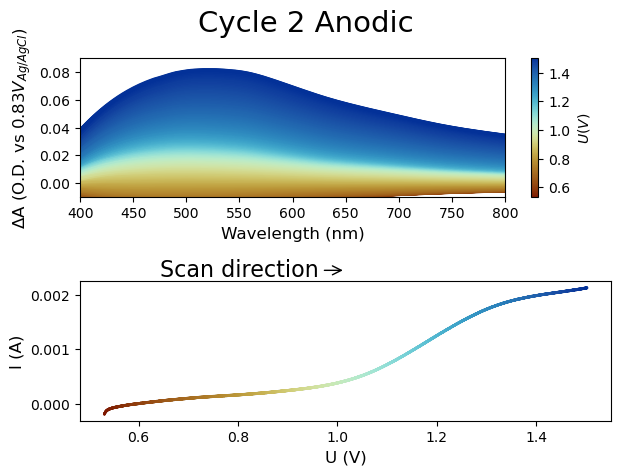

(9700, 2)


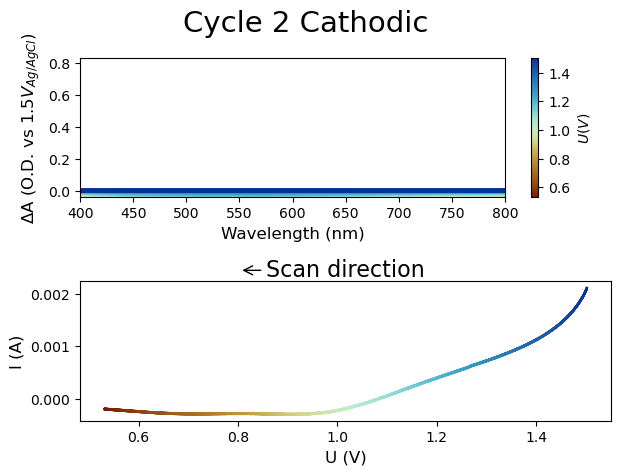

In [99]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 0.83, 71)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.09, y_min=-0.01,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 1.5, 71)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.83, y_min=-0.04,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.83V_{Ag/AgCl}$)'>)

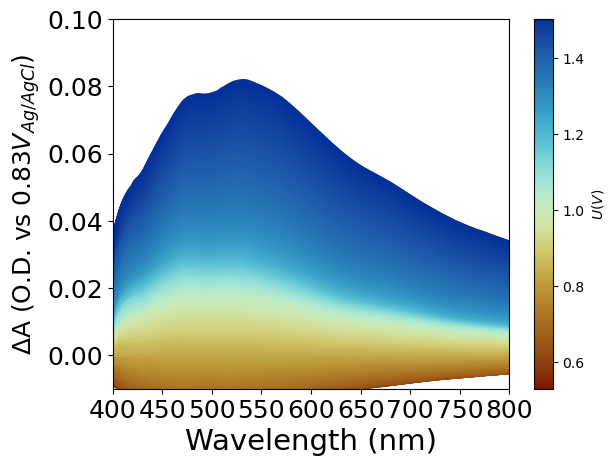

In [100]:
data, ref=sp.calculateDOD(SpEC1, 1, 'Anodic', 0.83, 21)
sp.plot_DOD(data, y_max=0.1, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

In [101]:
data=sp.calculateDOD(SpEC1, 1, 'Anodic', 0.83, 21)[0]
data

Voltage (V),0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,...,1.493,1.494,1.495,1.496,1.497,1.498,1.499,1.500,1.501,1.502
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
400,-0.003285,-0.005346,-0.004834,-0.006519,-0.004373,-0.003773,-0.005737,-0.006371,-0.005066,-0.005919,...,0.033079,0.032357,0.034297,0.033598,0.033352,0.033230,0.032684,0.035211,0.033714,0.035157
402,-0.004515,-0.006145,-0.005899,-0.007171,-0.005602,-0.004780,-0.006550,-0.007235,-0.006358,-0.006823,...,0.035862,0.035733,0.037210,0.036655,0.036608,0.036428,0.035864,0.037640,0.036677,0.037590
404,-0.005596,-0.006870,-0.006821,-0.007773,-0.006667,-0.005697,-0.007290,-0.007998,-0.007481,-0.007647,...,0.038286,0.038620,0.039712,0.039276,0.039397,0.039173,0.038606,0.039803,0.039263,0.039740
406,-0.006538,-0.007529,-0.007613,-0.008328,-0.007581,-0.006531,-0.007960,-0.008667,-0.008450,-0.008395,...,0.040384,0.041063,0.041843,0.041504,0.041766,0.041509,0.040952,0.041722,0.041506,0.041634
408,-0.007354,-0.008125,-0.008289,-0.008839,-0.008360,-0.007286,-0.008566,-0.009251,-0.009277,-0.009072,...,0.042191,0.043111,0.043642,0.043382,0.043760,0.043479,0.042943,0.043422,0.043441,0.043300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,-0.001430,-0.001287,-0.001522,-0.001542,-0.001360,-0.001252,-0.001596,-0.001628,-0.001760,-0.001701,...,0.021026,0.021089,0.021148,0.021505,0.021629,0.021568,0.021484,0.021658,0.021846,0.021932
936,-0.001432,-0.001274,-0.001523,-0.001534,-0.001364,-0.001256,-0.001610,-0.001632,-0.001772,-0.001703,...,0.020892,0.020936,0.021020,0.021335,0.021457,0.021411,0.021347,0.021511,0.021672,0.021778
938,-0.001446,-0.001265,-0.001533,-0.001533,-0.001386,-0.001270,-0.001638,-0.001652,-0.001798,-0.001720,...,0.020765,0.020783,0.020896,0.021156,0.021274,0.021251,0.021221,0.021365,0.021498,0.021620


(-0.0002, 0.003)

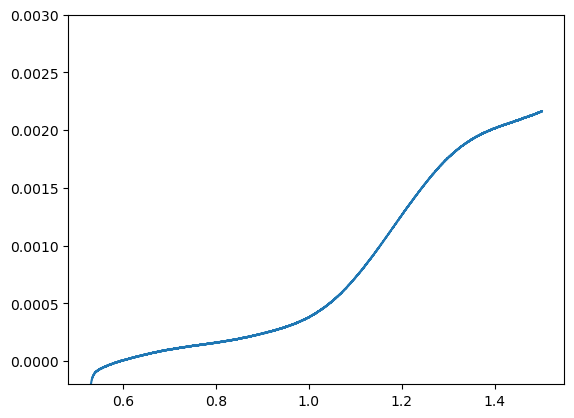

In [102]:
test=SpEC1.CV_scans[1]['Anodic']

# plot the fist and second collumns of test

plt.plot(test.iloc[:,1], test.iloc[:,2])
# set the y range from -0.0001 to 0.002
plt.ylim(-0.0002, 0.003)
#

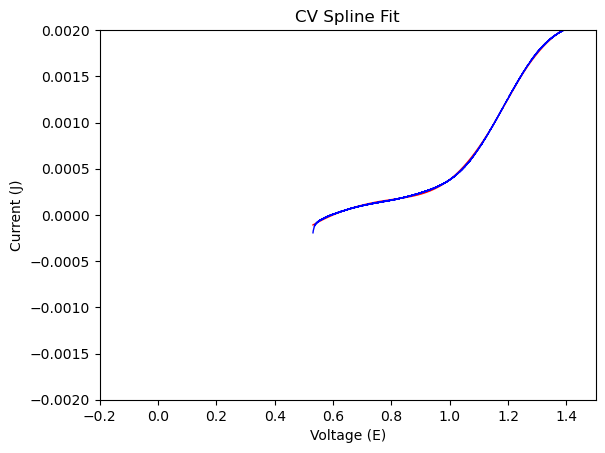

array(-0.00247086)

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Extract current and voltage data from the DataFrame
J = test.iloc[:, 2]
E = test.iloc[:, 1]

# Sort the data by voltage
sorted_indices = np.argsort(E)
E_sorted = E.iloc[sorted_indices]
J_sorted = J.iloc[sorted_indices]

# Fit the CV to a spline function
spl = UnivariateSpline(E_sorted, J_sorted)
spl.set_smoothing_factor(0.000001)

# Plot the spline function
plt.plot(E_sorted, spl(E_sorted), 'r', lw=1)

# Plot the original data
plt.plot(E_sorted, J_sorted, 'b', lw=1) 
plt.xlabel('Voltage (E)')
plt.ylabel('Current (J)')
plt.title('CV Spline Fit')
# set the x range from -0.2 to 1.5
plt.xlim(-0.2, 1.5)

# set the y range from -0.002 to 0.002
plt.ylim(-0.002, 0.002)

plt.show()

# use the spline function to calculate the current at a specific voltage
spl(0.)





In [104]:
sorted_indices

19401       0
19402       1
19403       2
19404       3
19405       4
         ... 
29096    9695
29097    9696
29098    9697
29099    9698
29100    9699
Name: Ewe_V, Length: 9700, dtype: int64

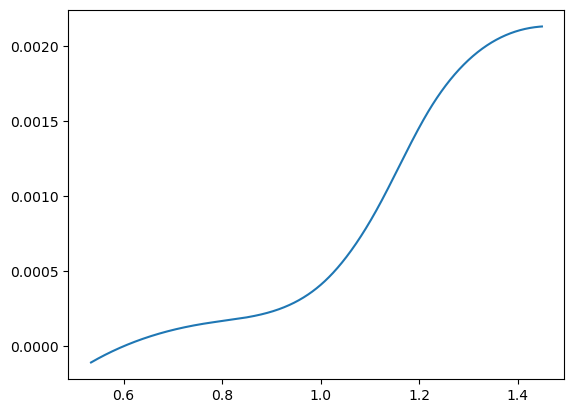

In [105]:
Spectral_voltages=data.columns.values
Spectral_currents=spl(Spectral_voltages)

Cell_resistance=25 # ohms

iR=Cell_resistance*Spectral_currents

Spectral_voltages_corrected=Spectral_voltages-iR

plt.plot(Spectral_voltages_corrected, Spectral_currents)



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.83V_{Ag/AgCl}$)'>)

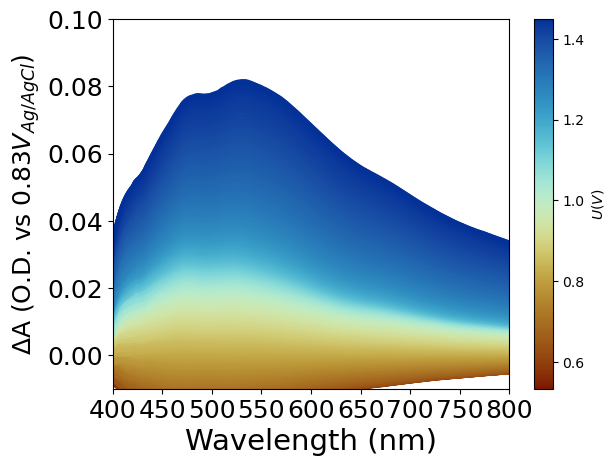

In [106]:
# use Spectral_voltages_corrected as the collumn names for the data

data_iR=data.copy(deep=True) 

data_iR.columns=Spectral_voltages_corrected

data_iR

# use plot_DOD to plot the data_iR

sp.plot_DOD(data_iR, y_max=0.1, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.83V_{Ag/AgCl}$)'>)

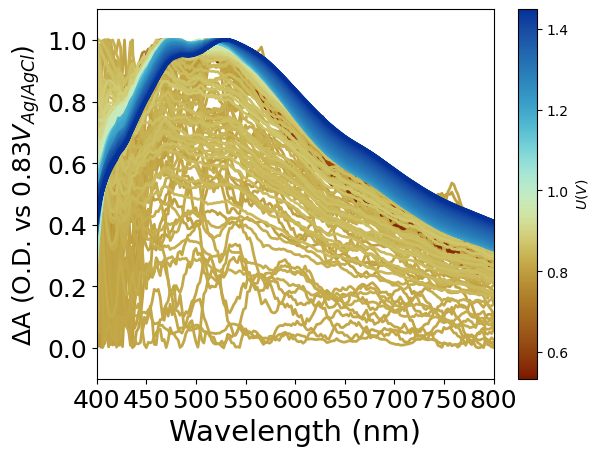

In [107]:

# normalise the data_iR

data_iR_norm=sp.normalise_DOD(data_iR.abs())

# plot the normalised data_iR

sp.plot_DOD(data_iR_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")



/var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/ipykernel_16130/1018428813.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
/var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/ipykernel_16130/1018428813.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
/var/folders/vm/d986p9hx0rlglk34b43v_h180000

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

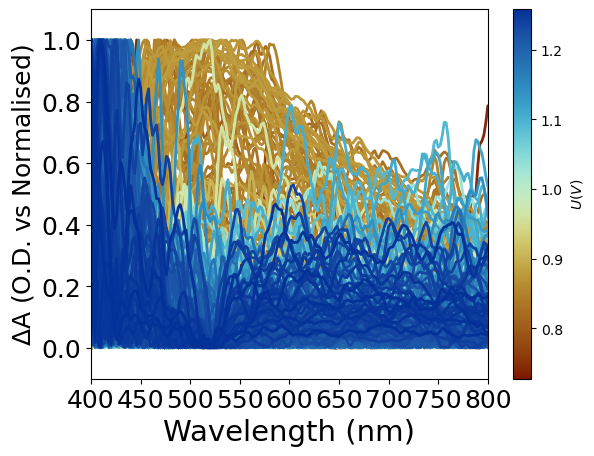

: 

In [112]:
# loop though data_iR_norm and from collumn 20 to collumn n-20 
# subtract collumn 20 from collumn i-20, put this into a new dataframe called data_iR_norm_diff

step=200
data_iR_diff=pd.DataFrame()
for i in range(step, len(data_iR_norm.columns)-step):
    data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
    # apply a savinky golay filter to the data_iR_norm_diff using the function savgol_filter from scipy.signal
    data_iR_diff[data_iR_norm.columns[i]]=signal.savgol_filter(data_iR_diff[data_iR_norm.columns[i]], 5, 3)

    
# normalise the data_iR_diff

data_iR_diff_norm=sp.normalise_DOD(data_iR_diff.abs())


sp.plot_DOD(data_iR_diff_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")




In [109]:
print(data_iR_diff_norm.columns.values[0], data_iR_diff_norm.columns.values[250], data_iR_diff_norm.columns.values[151])

0.5432735727236722 0.7869553040667037 0.6895156179623463


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

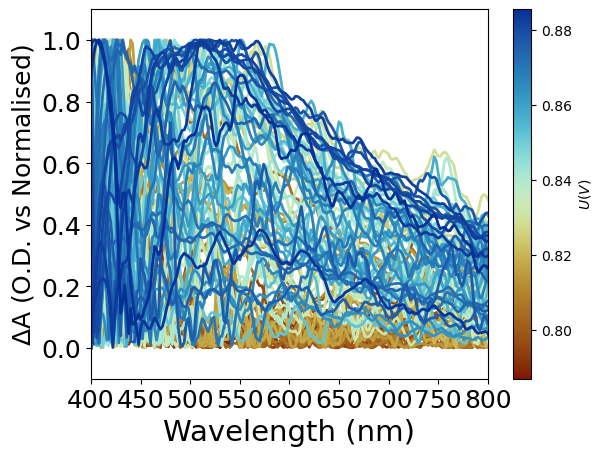

In [110]:
Ustart=data_iR_diff_norm.columns.values[250]
Uend=data_iR_diff_norm.columns.values[350]


# get the data between Ustart and Uend

data_iR_diff_norm_U=data_iR_diff_norm.loc[:, Ustart:Uend]

# plot the data_iR_diff_norm_U using a for loop
# first set the color map to cmc.roma   
# then plot the data_iR_diff_norm_U using the 